In [2]:
#Analise de dados publicos

In [4]:
import pandas as pd
low_memory = False #para carregar o arquivo mais rapido.
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=80
pd.options.display.max_rows = 90

In [5]:
arquivo = r'C:\Users\Caio mozaos2\COVID\INFLUD-21-06-2021.csv' #lendo arquivo
df = pd.read_csv(arquivo, delimiter=';', 
                 usecols='CS_RACA CS_ESCOL_N SEM_NOT DT_NOTIFIC SG_UF_NOT HISTO_VGM PAIS_VGM CARDIOPATI DIABETES OBESIDADE NU_IDADE_N ID_MUNICIP'.split(),
                 encoding='ISO-8859-1',
                 error_bad_lines=False) #para n abortar a leitura caso erro de colunas.

c:\users\caio mozaos2\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (115) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
for par in enumerate(df.columns): print (par)

(0, 'DT_NOTIFIC')
(1, 'SEM_NOT')
(2, 'SG_UF_NOT')
(3, 'ID_MUNICIP')
(4, 'NU_IDADE_N')
(5, 'CS_RACA')
(6, 'CS_ESCOL_N')
(7, 'CARDIOPATI')
(8, 'DIABETES')
(9, 'OBESIDADE')
(10, 'HISTO_VGM')
(11, 'PAIS_VGM')


In [9]:
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela', #trocando valores de acordo com o dicionario, cada numero representa uma raça.
              4:'Parda', 5:'Indígena', 9:'Ignorado'}

<AxesSubplot:xlabel='SEM_NOT'>

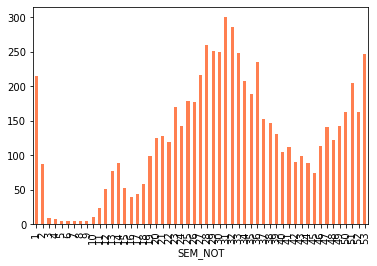

In [60]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"').groupby('SEM_NOT').size().plot(kind='bar', color='coral')

In [18]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count() #Pessoas que tem 60 ou +.

611394

<AxesSubplot:xlabel='SG_UF_NOT'>

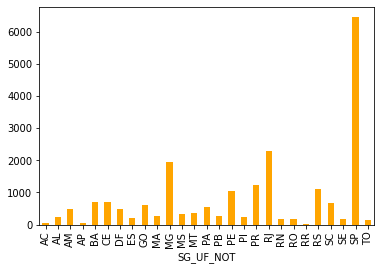

In [36]:
df.query('NU_IDADE_N == 60').groupby('SG_UF_NOT').size().plot(kind='bar',color='Orange') #Pessoas com 60 anos por estado. 

In [47]:
df.query('NU_IDADE_N == 60 and SG_UF_NOT == "SP" and DIABETES == 1').groupby('SG_UF_NOT').size().sort_values(ascending=False).head(10) #pessoas com 60 anos em SP com diabetes;

SG_UF_NOT
SP    1979
dtype: int64

In [50]:
df.query('NU_IDADE_N == 60 and SG_UF_NOT == "SP" and HISTO_VGM == 1').groupby('SG_UF_NOT').size().sort_values(ascending=False).head(10) #pessoas com 60 anos em SP com diabetes;

SG_UF_NOT
SP    3
dtype: int64

<AxesSubplot:ylabel='PAIS_VGM'>

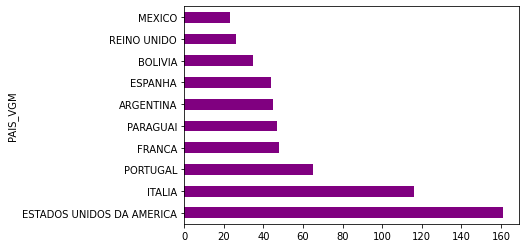

In [58]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='barh', color='purple')